This is the notebook that I will be starting my initial analysis of the database in.  Let's see how it goes!

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("DataBase_Draft_2_18_2020.csv")
#df.describe()
df.head()
list(df)

['ID',
 'GroupNum',
 'Height',
 'Weight',
 'Age',
 'Male',
 'RightLeg',
 'AdaptationDuration',
 'Abrupt',
 'MidSpeed',
 'SpeedRatio',
 'SpeedDifference',
 'SelfSelected',
 'FDBK',
 'Tmbase',
 'SlowBase',
 'FastBase',
 'MidBase',
 'EarlyA',
 'TMSteady',
 'TMAfter',
 'OGBase',
 'OFAfter']

Data Check
---

Here I want to look for outlier values which could just be in the wrong units or could be errors in the code.


In [7]:
import matplotlib.pyplot as plt  # To visualize

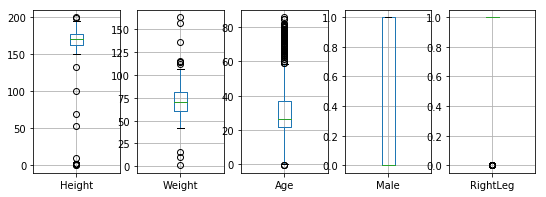

In [8]:
# First check on subject demographics
plt.figure(figsize=(9, 3))
plt.subplot(151)
hist = df.boxplot(column=["Height"])
plt.subplot(152)
hist = df.boxplot(column=["Weight"])
plt.subplot(153)
hist = df.boxplot(column=["Age"])
plt.subplot(154)
hist = df.boxplot(column=["Male"])
plt.subplot(155)
hist = df.boxplot(column=["RightLeg"])

So we hae some probelms in Height, Weight, and Age

For now I am going to set some threshold limits for these measures that removes values I think are false, but I also want to try to recover these values, if possible, at some point.  These are the ranges that I am currently thinking should be correct...
18>df["Age"]>90
40>df["Weight"]>200
1.3>df["Height"]>2.3

Even though there do not seem to be any problems with "Male" or "RightLeg" I could constrain them for future data...
df["Male"]==0 or df["Male"]==1
df["RightLeg"]==0 or df["RightLeg"]==1

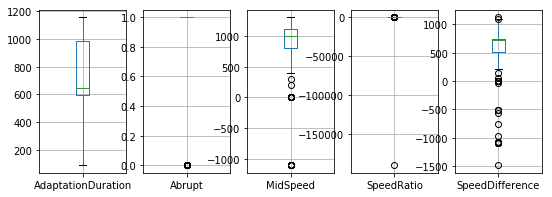

In [9]:
# Second check on Experimetal Setup
plt.figure(figsize=(9, 3))
plt.subplot(151)
hist = df.boxplot(column=["AdaptationDuration"])
plt.subplot(152)
hist = df.boxplot(column=["Abrupt"])
plt.subplot(153)
hist = df.boxplot(column=["MidSpeed"])
plt.subplot(154)
hist = df.boxplot(column=["SpeedRatio"])
plt.subplot(155)
hist = df.boxplot(column=["SpeedDifference"])

So there seem to be some issures with the speeds, negative speeds should not be possible here... unless we are consdiering the decline study?  Below are the ranges of data that I think I should have...

0<df["MidSpeed"]<3000
0<df["SpeedDifference"]<2000

df["Abrupt"]==0 or df["Abrupt"]==1
df["SpeedRatio"]==1 or df["SpeedRatio"]==2 or df["SpeedRatio"]==3

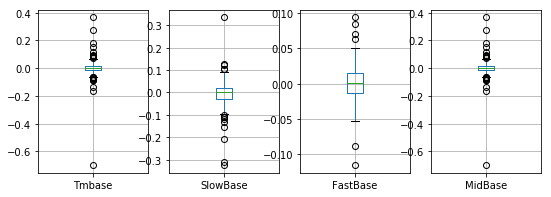

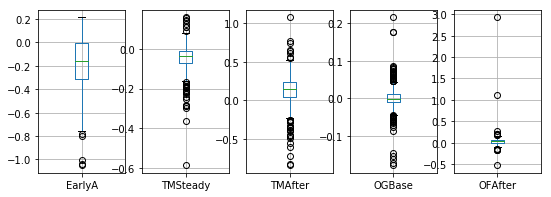

In [10]:
# Finally check on Step Length Asymmetry Outcome Measures
plt.figure(figsize=(9, 3))
plt.subplot(141)
hist = df.boxplot(column=["Tmbase"])
plt.subplot(142)
hist = df.boxplot(column=["SlowBase"])
plt.subplot(143)
hist = df.boxplot(column=["FastBase"])
plt.subplot(144)
hist = df.boxplot(column=["MidBase"])

plt.figure(figsize=(9, 3))
plt.subplot(151)
hist = df.boxplot(column=["EarlyA"])
plt.subplot(152)
hist = df.boxplot(column=["TMSteady"])
plt.subplot(153)
hist = df.boxplot(column=["TMAfter"])
plt.subplot(154)
hist = df.boxplot(column=["OGBase"])
plt.subplot(155)
hist = df.boxplot(column=["OFAfter"])

Baseline Step Length asymmetries look mostly okay, they could be positive or negative,

Some of the magnitudes look rather larger though, which may warrent further invesitgation

The OGAfter doesn't look that good, In that there a few rediculously large values, which may be difficult to pinpoint

Data cleaning 
---
For now I am going to populate this section when it is clearer what I should and shouldn't spend time working on.

https://github.com/Reproducible-Science-Curriculum/data-exploration-RR-Jupyter/blob/gh-pages/notebooks/Data_exploration.ipynb

In [11]:
pd.unique(df.Abrupt)

array([1, 0])

Catagorical Variables Analysis
---

https://matplotlib.org/tutorials/introductory/pyplot.html

t-test:
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

In [12]:
import matplotlib.pyplot as plt  # To visualize
import numpy as np #
from scipy import stats
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

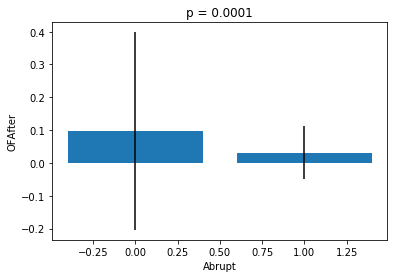

In [13]:
def BarPlotsCategorical(categorical="Abrupt", continuous="Age", catVals=[1, 0]):
    AbruptSteady=df.loc[df[categorical]==1 & (~np.isnan(df[continuous])) & (~np.isnan(df[categorical])), continuous]
    GradualSteady=df.loc[df[categorical]==0 & (~np.isnan(df[continuous])) & (~np.isnan(df[categorical])), continuous]
    #AbruptSteady=df.loc[df[categorical]==1, continuous]
    #GradualSteady=df.loc[df[categorical]==0, continuous]
    AbruptMeanSteady=AbruptSteady.mean()
    GradualMeanSteady=GradualSteady.mean()
    AbruptMeanSteadySTD=AbruptSteady.std()
    GradualMeanSteadySTD=GradualSteady.std()
    plt.bar(catVals, [AbruptMeanSteady, GradualMeanSteady], yerr=[AbruptMeanSteadySTD, GradualMeanSteadySTD])
    plt.xlabel(categorical)
    plt.ylabel(continuous)
    t2, p2 = stats.ttest_ind(AbruptSteady,GradualSteady)
    plt.title("p = " + str(np.round(p2, 4)))

#BarPlotsCategorical("Abrupt", "Tmbase")
#BarPlotsCategorical("Abrupt", "EarlyA")
#BarPlotsCategorical("Abrupt", "TMSteady")
#BarPlotsCategorical("Abrupt", "TMAfter")
BarPlotsCategorical("Abrupt", "OFAfter")

#BarPlotsCategorical("Male", "Tmbase")
#BarPlotsCategorical("Male", "EarlyA")
#BarPlotsCategorical("Male", "TMSteady")
#BarPlotsCategorical("Male", "TMAfter")
#BarPlotsCategorical("Male", "OFAfter")

#BarPlotsCategorical("RightLeg", "Tmbase")
#BarPlotsCategorical("RightLeg", "EarlyA")
#BarPlotsCategorical("RightLeg", "TMSteady")
#BarPlotsCategorical("RightLeg", "TMAfter")
#BarPlotsCategorical("RightLeg", "OFAfter")

#BarPlotsCategorical("SpeedRatio", "Tmbase")
#BarPlotsCategorical("SpeedRatio", "EarlyA")
#BarPlotsCategorical("SpeedRatio", "TMSteady")
#BarPlotsCategorical("SpeedRatio", "TMAfter")
#BarPlotsCategorical("SpeedRatio", "OFAfter")

New Linear Regression 
----
Now compatable with Multiple Linear Regression

https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://datatofish.com/multiple-linear-regression-python/

So I need to decide what to do with missing data points. It seems like a mask would work well for the simple linear regresssions, but I am not as sure once we start doing multiple linear regression.  I doesn't seem like panadas supports something about missing data, so it will have to be a different package. (https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

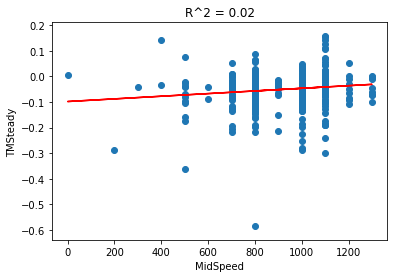

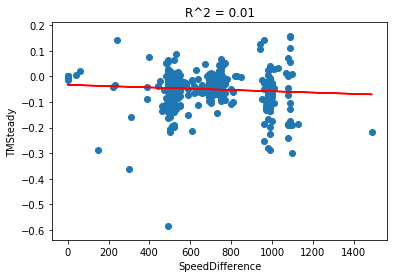

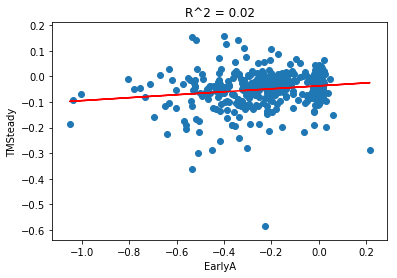

In [18]:
def AbruptLinearRegression(xName="Abrupt", yName="Age", AbsX=0):
    x=df.loc[(~np.isnan(df[yName])) & (~np.isnan(df[xName])) & (df.Abrupt==1), ([xName])].values.reshape(-1, order='F')
    if AbsX==1:
        x=abs(x)
    y=df.loc[(~np.isnan(df[yName])) & (~np.isnan(df[xName])) & (df.Abrupt==1), ([yName])].values.reshape(-1, order='F')
    
    # Create a data frame containing all the relevant variables
    data = {'x': x, 'y': y}

    #from statsmodels.formula.api import ols
    model = ols("y ~ x", data).fit()
    #print(model.summary())
    
    y_pred = model.fittedvalues
    #y_pred = model.predict(x)
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.title('R^2 = '+ str(round(model.rsquared, 2)))
    plt.show()

 
## Influence of AGE on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
#AbruptLinearRegression("Age", "TMSteady")
#AbruptLinearRegression("Age", "EarlyA")
#AbruptLinearRegression("Age", "TMAfter")
#AbruptLinearRegression("Age", "OFAfter")

## Influence of Baseline on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
#AbruptLinearRegression("MidBase", "TMSteady")
#AbruptLinearRegression("MidBase", "EarlyA")
#AbruptLinearRegression("MidBase", "TMAfter")
#AbruptLinearRegression("MidBase", "OFAfter")

## Influence of Baseline Speed on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
AbruptLinearRegression("MidSpeed", "TMSteady", 1)
#AbruptLinearRegression("MidSpeed", "EarlyA", 1)
#AbruptLinearRegression("MidSpeed", "TMAfter", 1)
#AbruptLinearRegression("MidSpeed", "OFAfter", 1)

## Influence of SpeedDifference on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
AbruptLinearRegression("SpeedDifference", "TMSteady", 1)
#AbruptLinearRegression("SpeedDifference", "EarlyA", 1)
#AbruptLinearRegression("SpeedDifference", "TMAfter", 1)
#AbruptLinearRegression("SpeedDifference", "OFAfter", 1)

## Influence of Adaptaiton Duration on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
#AbruptLinearRegression("AdaptationDuration", "TMSteady")
#AbruptLinearRegression("AdaptationDuration", "EarlyA")
#AbruptLinearRegression("AdaptationDuration", "TMAfter")
#AbruptLinearRegression("AdaptationDuration", "OFAfter")

## Influence of Early Adaptation  on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
AbruptLinearRegression("EarlyA", "TMSteady")
#AbruptLinearRegression("EarlyA", "TMAfter")
#AbruptLinearRegression("EarlyA", "OFAfter")

## Influence of Steady State  on outcomes measures ~~~~~~~~~~~~~~~~~~~~~~~~
#AbruptLinearRegression("TMSteady", "TMAfter")
#AbruptLinearRegression("TMSteady", "OFAfter")

Multiple Linear Regression
-----

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c

https://datascienceplus.com/multiple-linear-regression-in-python/

In [19]:
##pip install statsmodels
## Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install statsmodels cjs180

#from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     8.078
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           0.000354
Time:                        10:53:13   Log-Likelihood:                 623.18
No. Observations:                 484   AIC:                            -1240.
Df Residuals:                     481   BIC:                            -1228.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0107      0.016      0.676      0.4

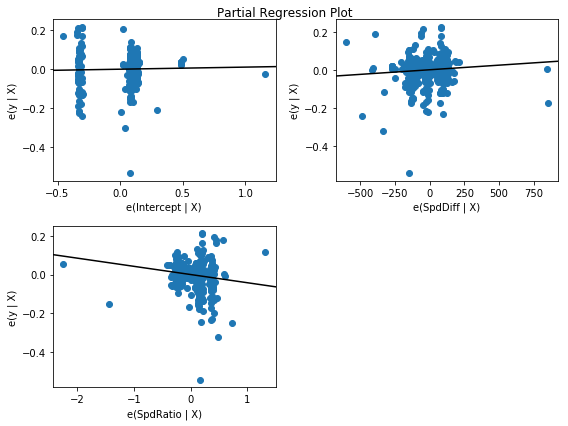

In [28]:
# Influence of Speed Ratio and Difference on Adaptation behaviors -------
x1=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (abs(df.SpeedRatio)<4), ("SpeedDifference")].values.reshape(-1, order='F')
x1=abs(x1)
x2=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (abs(df.SpeedRatio)<4), ("SpeedRatio")].values.reshape(-1, order='F')
x2=abs(x2)
y=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (abs(df.SpeedRatio)<4), ("TMSteady")].values.reshape(-1, order='F')

x3=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (abs(df.SpeedRatio)<4), ("Abrupt")].values.reshape(-1, order='F')
AbruptWhere=(x3==1)
GradualWhere=(x3==0)
x4=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (abs(df.SpeedRatio)<4), ("Age")].values.reshape(-1, order='F')
OldWhere=(x4>=40)
YoungWhere=(x4<39)

AbruptYoung=np.logical_and((x3==1), (x4<39))
AbruptOld=np.logical_and((x3==1), (x4>=40))
GradualYoung=np.logical_and((x3==0), (x4<39))
GradualOld=np.logical_and((x3==0), (x4>=40))
#x1=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.MidSpeed)), ("SpeedDifference")].values.reshape(-1, order='F')
#x2=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.MidSpeed)), ("SpeedRatio")].values.reshape(-1, order='F')
#x3=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.MidSpeed)), ("MidSpeed")].values.reshape(-1, order='F')
#y=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.MidSpeed)), ("TMSteady")].values.reshape(-1, order='F')

# Create a data frame containing all the relevant variables
data = {'SpdDiff': x1, 'SpdRatio': x2, 'y': y}

#from statsmodels.formula.api import ols
model = ols("y ~ SpdDiff + SpdRatio", data).fit()

print(model.summary())

fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

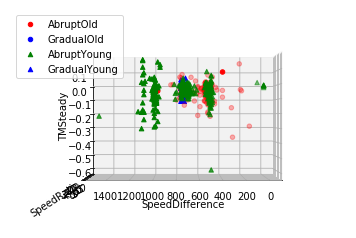

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data["x1"][AbruptOld], data["x2"][AbruptOld], data["y"][AbruptOld], c='r', marker='o', label='AbruptOld')
ax.scatter(data["x1"][GradualOld], data["x2"][GradualOld], data["y"][GradualOld], c='b', marker='o', label='GradualOld')
ax.scatter(data["x1"][AbruptYoung],data["x2"][AbruptYoung], data["y"][AbruptYoung], c='g', marker='^', label='AbruptYoung')
ax.scatter(data["x1"][GradualYoung],data["x2"][GradualYoung], data["y"][GradualYoung], c='b', marker='^', label='GradualYoung')

ax.set_xlabel('SpeedDifference')
ax.set_ylabel('SpeedRatio')
ax.set_zlabel('TMSteady')  

ax.view_init(elev=0, azim=0) # View x and z
ax.view_init(elev=0, azim=90) # View y and z

ax.legend()

plt.show()

### Many Factors

In [31]:
SpdDiff=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("SpeedDifference")].values.reshape(-1, order='F')
SpdDiff=abs(SpdDiff)
Male=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("Male")].values.reshape(-1, order='F')
Leg=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("RightLeg")].values.reshape(-1, order='F')
Abrupt=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("Abrupt")].values.reshape(-1, order='F')
RightLeg=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("RightLeg")].values.reshape(-1, order='F')
SpdRatio=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("SpeedRatio")].values.reshape(-1, order='F')
SpdRatio=abs(SpdRatio)
EarlyA=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("EarlyA")].values.reshape(-1, order='F')
MidBase=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("MidBase")].values.reshape(-1, order='F')
MidSpd=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("MidSpeed")].values.reshape(-1, order='F')
MidSpd=abs(MidSpd)
ADur=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("AdaptationDuration")].values.reshape(-1, order='F')

# Contineous Age measure
AgeCont=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("Age")].values.reshape(-1, order='F')

# Categorical Age Measure (please don't be offended!)
AgeCat = 1*(AgeCont>=40)

Height=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("Height")].values.reshape(-1, order='F')
Weight=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("Weight")].values.reshape(-1, order='F')




y=df.loc[(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.RightLeg)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (abs(df.SpeedRatio)<4), ("TMSteady")].values.reshape(-1, order='F')



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     9.150
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           3.96e-07
Time:                        10:54:11   Log-Likelihood:                 627.73
No. Observations:                 481   AIC:                            -1245.
Df Residuals:                     476   BIC:                            -1225.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0796      0.019     -4.159      0.0

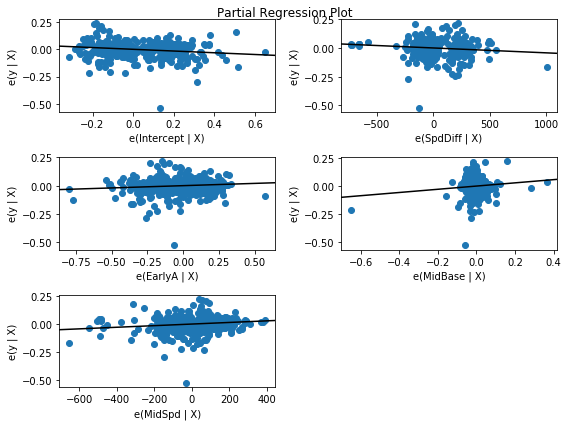

In [35]:
# Create a data frame containing all the relevant variables
data = {'SpdDiff': SpdDiff, 'Leg': RightLeg, 'SpdRatio': SpdRatio, 'EarlyA': EarlyA, 'MidBase': MidBase, 'MidSpd': MidSpd, 'ADur': ADur,'AgeCont': AgeCont,'AgeCat': AgeCat, 'Abrupt': Abrupt, 'Male': Male, 'Height': Height, 'Weight': Weight, 'y': y}

#from statsmodels.formula.api import ols
model = ols("y ~ SpdDiff + EarlyA + MidBase + MidSpd", data).fit()#+ C(Male) * C(Abrupt)
print(model.summary())


fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

Although this multiple linear regression is not particularly strong, it importnatly shows that both the speed ratio and the speed difference between the belts during adaptation are important.  The interaction was not significant (p=0.065) so I remove this term.  

PCA
---
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
import numpy as np 
import pandas as pd

df = pd.read_csv("DataBase_Draft_2_18_2020.csv")

In [59]:
targetName='TMSteady'
#targetName='TMAfter'
#targetName='OFAfter'
featureNames=['MidSpeed', 'SpeedRatio', 'SpeedDifference', 'AdaptationDuration', 'MidBase', 'Age', 'EarlyA']

goodIndex=(~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

# Separating out the features
x = df.loc[goodIndex, featureNames].values

# Separating out the target
y = df.loc[goodIndex, targetName].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[targetName]], axis = 1)

pca.explained_variance_ratio_

array([0.30605766, 0.23097755, 0.15176101])

Text(0,0.5,'Principal Component 2')

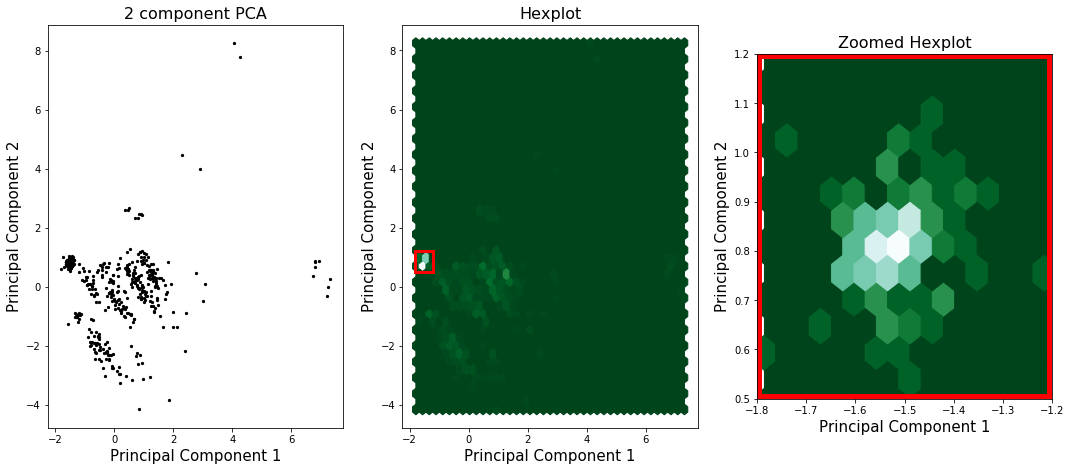

In [60]:
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(1,3,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 16)
ax.scatter(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], c = 'k', s = 5, label="Abrupt")
ax.set_aspect('equal', 'box')

ax = fig.add_subplot(1,3,2) 
nbins=40
ax.hexbin(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], gridsize=nbins, cmap=plt.cm.BuGn_r)
plt.gca().add_patch(Rectangle((-1.8,.5), .6, .7,linewidth=3,edgecolor='r',facecolor='none'))
ax.set_aspect('equal', 'box')  
ax.set_title('Hexplot', fontsize = 16)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

                
ax = fig.add_subplot(1,3,3) 
nbins=200
ax.hexbin(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], gridsize=nbins, cmap=plt.cm.BuGn_r)
plt.gca().add_patch(Rectangle((-1.8,.5), .6, .7,linewidth=10,edgecolor='r',facecolor='none'))
ax.set_xlim(-1.8, -1.2)
ax.set_ylim(.5, 1.2)
ax.set_title('Zoomed Hexplot', fontsize = 16)
ax.set_aspect('equal', 'box')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)


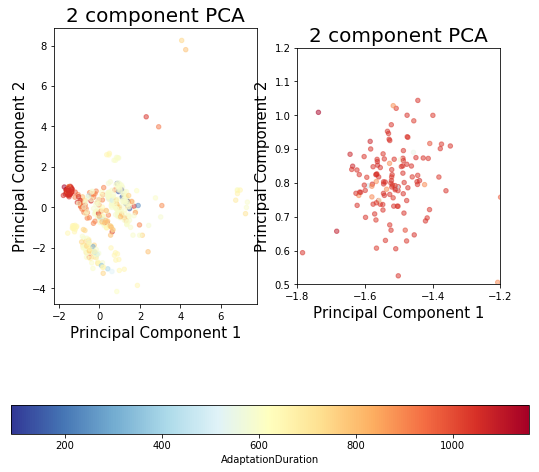

In [62]:
#VarOfInterest="Age"
#VarOfInterest="MidSpeed" #-- MESSED UP
#VarOfInterest="SpeedRatio" #-- TOO MESSED UP
#VarOfInterest='SpeedDifference' #-- *Larger perturbation seem to be important
VarOfInterest='AdaptationDuration' #-- * Seems like catch people (assuming that those>600 have a catch) are different from the rest.  Could be interesting.
#VarOfInterest='MidBase' #-- TOO MESSED UP
#VarOfInterest='EarlyA'
#VarOfInterest='TMSteady' #-- MESSED UP
#VarOfInterest='Abrupt'
#VarOfInterest='Male'
#VarOfInterest='RightLeg'
#VarOfInterest='Height'
#VarOfInterest='Weight'
#VarOfInterest='FDBK'




cmap = plt.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=df.loc[:, VarOfInterest].min(), vmax=df.loc[:, VarOfInterest].max())
barcolors = plt.cm.ScalarMappable(norm, cmap)


fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], c = df.loc[:, VarOfInterest].values, s = 20, cmap=cmap, alpha=.5)
ax.set_aspect('equal', 'box')

ax = fig.add_subplot(1,2,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_xlim(-1.8, -1.2)
ax.set_ylim(.5, 1.2)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], c = df.loc[:, VarOfInterest].values, s = 20, cmap=cmap, alpha=.5)
ax.set_aspect('equal', 'box')

fig.subplots_adjust(bottom=0.25)
ax1=fig.add_axes([0.05, 0.10, 0.9, .05])
cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm, orientation='horizontal')
cb1.set_label(VarOfInterest)



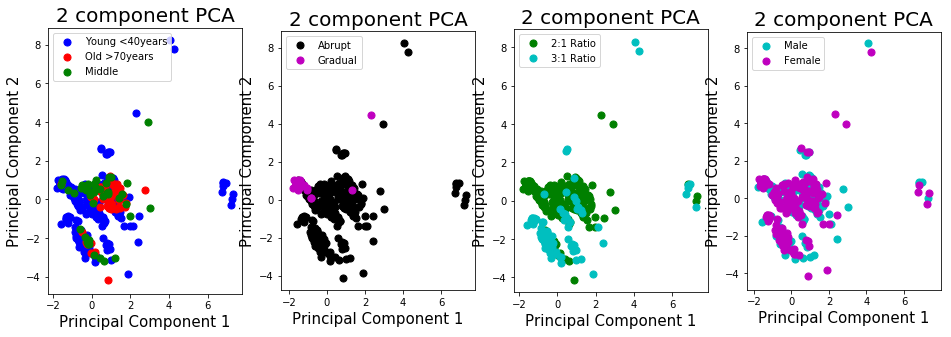

In [48]:
oldIndex=(df.Age>=70) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
middleIndex=(df.Age<70) & (df.Age>=40) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
youngIndex=(df.Age<39) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

AbruptIndex=(df.Abrupt==1) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
GradualIndex=(df.Abrupt==0) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

Ratio2Index=(df.SpeedRatio==2) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
Ratio3Index=(df.SpeedRatio==3) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

MaleIndex=(df.Male==1) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
FemaleIndex=(df.Male==0) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

cmap = plt.cm.RdYlBu_r
norm = mpl.colors.Normalize(vmin=df.loc[:, "Age"].min(), vmax=df.loc[:, "Age"].max())
barcolors = plt.cm.ScalarMappable(norm, cmap)


fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1,4,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf.loc[youngIndex, 'principal component 1'], finalDf.loc[youngIndex, 'principal component 2'], c = 'b', s = 50, label="Young <40years")
ax.scatter(finalDf.loc[oldIndex, 'principal component 1'], finalDf.loc[oldIndex, 'principal component 2'], c = 'r', s = 50, label="Old >70years")
ax.scatter(finalDf.loc[middleIndex, 'principal component 1'], finalDf.loc[middleIndex, 'principal component 2'], c = 'g', s = 50, label="Middle")
ax.set_aspect('equal', 'box')
ax.legend()


ax = fig.add_subplot(1,4,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[AbruptIndex, 'principal component 1'], finalDf.loc[AbruptIndex, 'principal component 2'], c = 'k', s = 50, label="Abrupt")
ax.scatter(finalDf.loc[GradualIndex, 'principal component 1'], finalDf.loc[GradualIndex, 'principal component 2'], c = 'm', s = 50, label="Gradual")
ax.set_aspect('equal', 'box')
ax.legend()

ax = fig.add_subplot(1,4,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[Ratio2Index, 'principal component 1'], finalDf.loc[Ratio2Index, 'principal component 2'], c = 'g', s = 50, label="2:1 Ratio")
ax.scatter(finalDf.loc[Ratio3Index, 'principal component 1'], finalDf.loc[Ratio3Index, 'principal component 2'], c = 'c', s = 50, label="3:1 Ratio")
ax.set_aspect('equal', 'box')
ax.legend()

ax = fig.add_subplot(1,4,4) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[MaleIndex, 'principal component 1'], finalDf.loc[MaleIndex, 'principal component 2'], c = 'c', s = 50, label="Male")
ax.scatter(finalDf.loc[FemaleIndex, 'principal component 1'], finalDf.loc[FemaleIndex, 'principal component 2'], c = 'm', s = 50, label="Female")
ax.set_aspect('equal', 'box')
ax.legend()

plt.show()



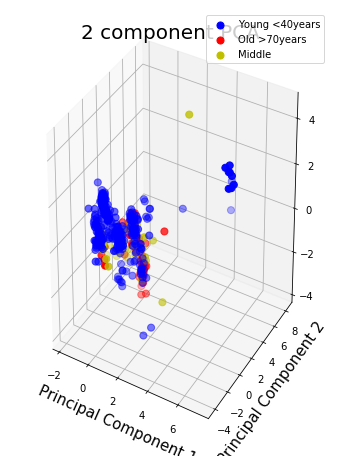

In [49]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[youngIndex, 'principal component 1'], finalDf.loc[youngIndex, 'principal component 2'],finalDf.loc[youngIndex, 'principal component 3'], c = 'b', s = 50, label="Young <40years")
ax.scatter(finalDf.loc[oldIndex, 'principal component 1'], finalDf.loc[oldIndex, 'principal component 2'], finalDf.loc[oldIndex, 'principal component 3'],c = 'r', s = 50, label="Old >70years")
ax.scatter(finalDf.loc[middleIndex, 'principal component 1'], finalDf.loc[middleIndex, 'principal component 2'],finalDf.loc[middleIndex, 'principal component 3'], c = 'y', s = 50, label="Middle")
ax.set_aspect('equal', 'box')
ax.legend()

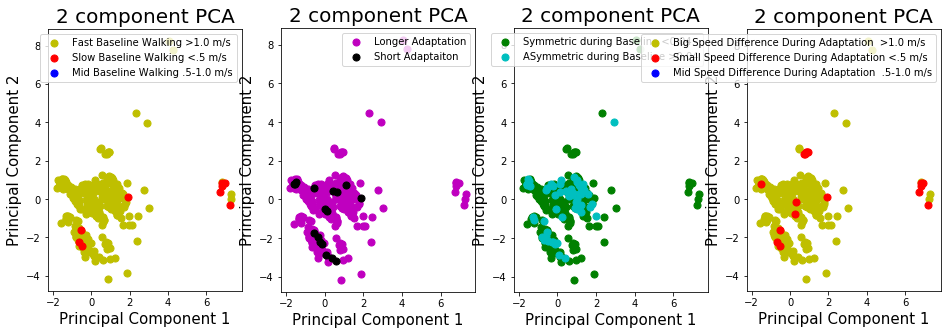

In [50]:
SlowIndex=(df.MidSpeed<=.5) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
NormalIndex=(df.MidSpeed>.5) & (df.MidSpeed<1) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
FastIndex=(df.MidSpeed>=1) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

ShortAIndex=(df.AdaptationDuration<550) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
NormalAIndex=(df.AdaptationDuration>=550) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

SymmIndex=(abs(df.MidBase)<=.04) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
AsymmIndex=(abs(df.MidBase)>.04) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))

SmallDiffIndex=(df.SpeedDifference<=.5) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
NormalDiffIndex=(df.SpeedDifference>.5) & (df.MidSpeed<1) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))
BigDiffIndex=(df.SpeedDifference>=1) & (~np.isnan(df.TMSteady)) & (~np.isnan(df.SpeedDifference)) & (~np.isnan(df.SpeedRatio)) & (~np.isnan(df.EarlyA)) & (~np.isnan(df.MidBase)) & (~np.isnan(df.Age)) & (~np.isnan(df.AdaptationDuration))


fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1,4,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[FastIndex, 'principal component 1'], finalDf.loc[FastIndex, 'principal component 2'], c = 'y', s = 50, label="Fast Baseline Walking >1.0 m/s")
ax.scatter(finalDf.loc[SlowIndex, 'principal component 1'], finalDf.loc[SlowIndex, 'principal component 2'], c = 'r', s = 50, label="Slow Baseline Walking <.5 m/s")
ax.scatter(finalDf.loc[NormalIndex, 'principal component 1'], finalDf.loc[NormalIndex, 'principal component 2'], c = 'b', s = 50, label="Mid Baseline Walking .5-1.0 m/s")

ax.set_aspect('equal', 'box')
ax.legend()

ax = fig.add_subplot(1,4,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[NormalAIndex, 'principal component 1'], finalDf.loc[NormalAIndex, 'principal component 2'], c = 'm', s = 50, label="Longer Adaptation")
ax.scatter(finalDf.loc[ShortAIndex, 'principal component 1'], finalDf.loc[ShortAIndex, 'principal component 2'], c = 'k', s = 50, label="Short Adaptaiton")
ax.set_aspect('equal', 'box')
ax.legend()

ax = fig.add_subplot(1,4,3) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[SymmIndex, 'principal component 1'], finalDf.loc[SymmIndex, 'principal component 2'], c = 'g', s = 50, label="Symmetric during Baseline <0.04")
ax.scatter(finalDf.loc[AsymmIndex, 'principal component 1'], finalDf.loc[AsymmIndex, 'principal component 2'], c = 'c', s = 50, label="ASymmetric during Baseline >0.04")
ax.set_aspect('equal', 'box')
ax.legend()

ax = fig.add_subplot(1,4,4) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[BigDiffIndex, 'principal component 1'], finalDf.loc[BigDiffIndex, 'principal component 2'], c = 'y', s = 50, label="Big Speed Difference During Adaptation  >1.0 m/s")
ax.scatter(finalDf.loc[SmallDiffIndex, 'principal component 1'], finalDf.loc[SmallDiffIndex, 'principal component 2'], c = 'r', s = 50, label="Small Speed Difference During Adaptation <.5 m/s")
ax.scatter(finalDf.loc[NormalDiffIndex, 'principal component 1'], finalDf.loc[NormalDiffIndex, 'principal component 2'], c = 'b', s = 50, label="Mid Speed Difference During Adaptation  .5-1.0 m/s")

ax.set_aspect('equal', 'box')
ax.legend()

plt.show()

K-means clustering on PCA
---
K-means clustering represents an unsupervised clustering algorithm that needs unlabelled data to train

http://benalexkeen.com/k-means-clustering-in-python/

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
df = pd.DataFrame({
    "x": finalDf.loc[:, 'principal component 1'],
    "y": finalDf.loc[:, 'principal component 2']
})

k=4
centroids = {1: [0, -2], 2: [0, 0], 3: [1.5, 0]}
print(centroids)

{1: [0, -2], 2: [0, 0], 3: [1.5, 0]}


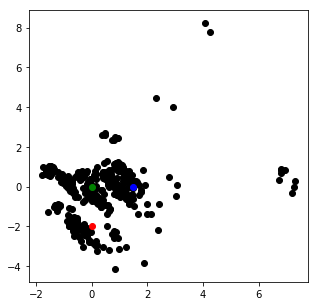

In [53]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
ax.set_aspect('equal', 'box')
plt.show()

In [54]:
## Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

AttributeError: 'float' object has no attribute 'lstrip'